In [1]:
# https://github.com/ranaroussi/futuresio-webinars/blob/master/01-prototyping-trading-strategies.ipynb

%matplotlib inline

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
# import mplfinance as mpf # https://github.com/matplotlib/mplfinance
from matplotlib import gridspec

# set default plotting size
import matplotlib.pylab
matplotlib.pylab.rcParams['figure.figsize'] = (12, 7)

# helper function for candlestick plotting
import matplotlib.dates as mdates
try:
    from mpf import candlestick_ohlc
except ImportError:
    #     from matplotlib.finance import candlestick_ohlc
    pass

def plot_candlestick(df, ax=None, fmt="%Y-%m-%d", cols=["open", "high", "low", "close"]):
    if ax is None:
        fig, ax = plt.subplots()
        
    idx_name = df.index.name
    dat = df.reset_index()[[idx_name]+cols]
    dat[df.index.name] = dat[df.index.name].map(mdates.date2num)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt))
    plt.xticks(rotation=45)
    _ = candlestick_ohlc(ax, dat.values, width=.6, colorup='g', alpha =1)
    ax.set_xlabel(idx_name)
    ax.set_ylabel("Price")
    return ax

In [2]:
# https://github.com/ranaroussi/futuresio-webinars/blob/master/01-prototyping-trading-strategies.ipynb
t = yf.Ticker('SPY')
spy = t.history(start="2000-01-01", auto_adjust=True)
spy = spy.drop(['Dividends', 'Stock Splits'], axis=1)
spy.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,100.044041,100.044041,97.091645,98.146072,8164300
2000-01-04,96.859698,97.218203,94.234173,94.307983,8089800
2000-01-05,94.434507,95.510023,92.620893,94.476685,12177900
2000-01-06,94.223649,95.488962,92.958336,92.958336,6227200
2000-01-07,94.687580,98.356987,94.518871,98.356987,8066500


In [16]:
spy.to_csv('~/Desktop/trading/sp500.csv')

In [3]:
spy.shape

(5317, 5)

In [20]:
spy['Return'] = spy['Close'].pct_change()
returns = spy['Return']
returns.describe()

count    5316.000000
mean        0.000338
std         0.012515
min        -0.109424
25%        -0.004597
50%         0.000680
75%         0.005928
max         0.145198
Name: Return, dtype: float64

In [39]:
# how often it returned > 5% a day?
spy[returns > .005]['Return'].describe()

count    1516.000000
mean        0.012799
std         0.010107
min         0.005003
25%         0.006948
50%         0.009912
75%         0.014607
max         0.145198
Name: Return, dtype: float64

<AxesSubplot:xlabel='Date'>

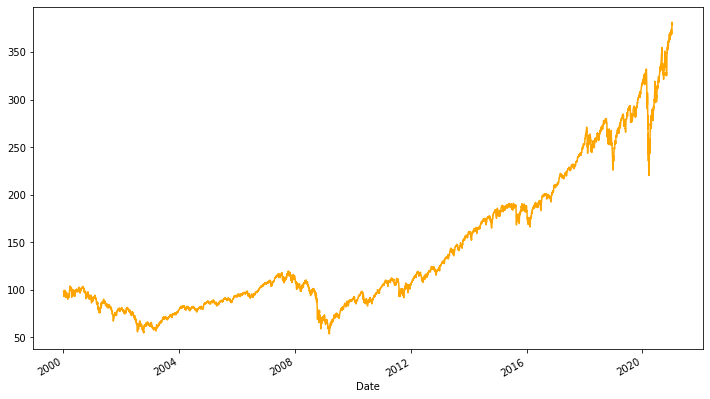

In [51]:
spy['Close'].plot(color='orange')

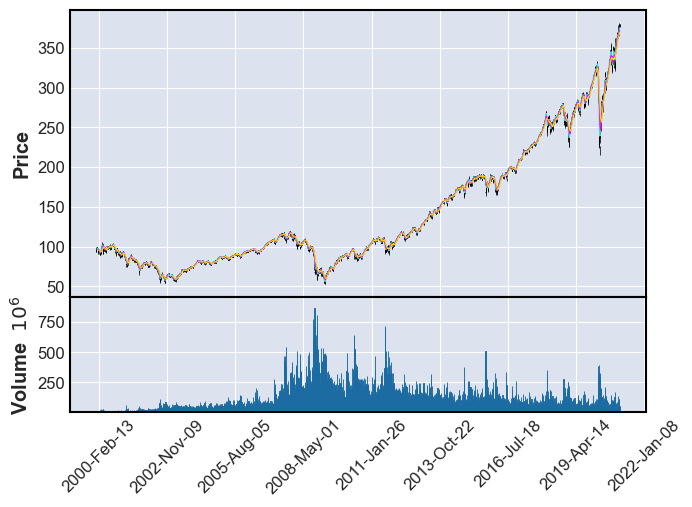

In [112]:
# type='ohlc' renko' 'line' 'candle' 'pnf'
# mav = moving averages
# https://github.com/matplotlib/mplfinance
mpf.plot(spy, type='ohlc', mav=(10, 20, 30), volume=True, show_nontrading=True)

2021-01-07


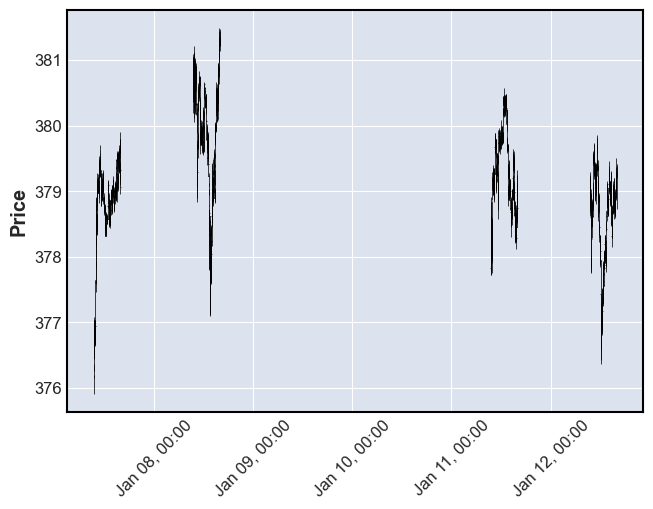

In [111]:
# intraday for the past 6 days
from datetime import datetime, timedelta
start = (datetime.now() - timedelta(6)).strftime('20%y-%m-%d')

print(start)
intra = t.history(start=start, interval = "1m")
# print(intra.shape)
# intra.head()
# intra.tail()
d = intra.loc['2021-01-07':'2021-01-12']
mpf.plot(d, show_nontrading=True)

<AxesSubplot:ylabel='Frequency'>

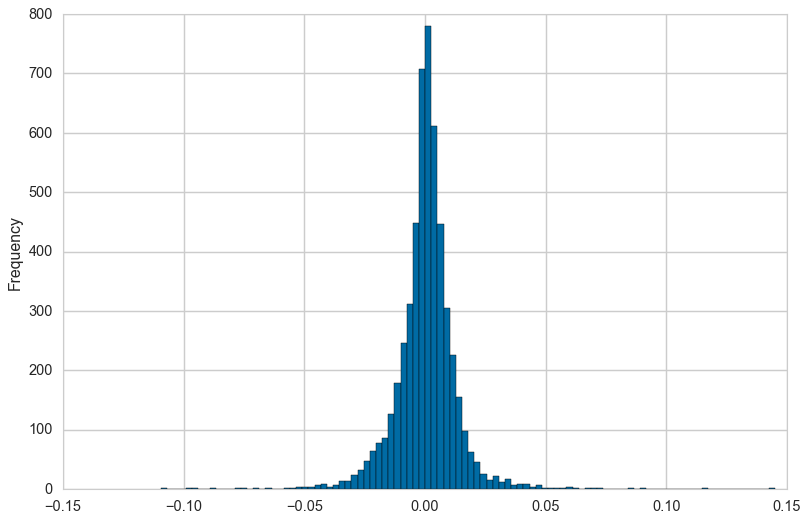

In [153]:
# https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html
plt.style.use(
    'tableau-colorblind10'
)
ok = [
    'Solarize_Light2',
    'ggplot',
    'seaborn',
    'seaborn-colorblind',
    'seaborn-dark',
    'seaborn-dark-palette',
    'seaborn-darkgrid',
    'seaborn-deep',
    'seaborn-ticks',
    'seaborn-whitegrid',
    'tableau-colorblind10'
]
returns.plot.hist(bins=100)

In [159]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
returns.resample('A').sum() * 100

Date
2000-12-31    -6.429873
2001-12-31   -10.111412
2002-12-31   -20.833343
2003-12-31    26.199022
2004-12-31    10.784492
2005-12-31     5.246428
2006-12-31    15.209544
2007-12-31     6.277703
2008-12-31   -37.358537
2009-12-31    26.929428
2010-12-31    15.631107
2011-12-31     4.527769
2012-12-31    15.638894
2013-12-31    28.622718
2014-12-31    13.265251
2015-12-31     2.414633
2016-12-31    12.184700
2017-12-31    19.876699
2018-12-31    -3.231725
2019-12-31    27.969367
2020-12-31    22.469183
2021-12-31     1.327746
Freq: A-DEC, Name: Return, dtype: float64

<AxesSubplot:xlabel='Date'>

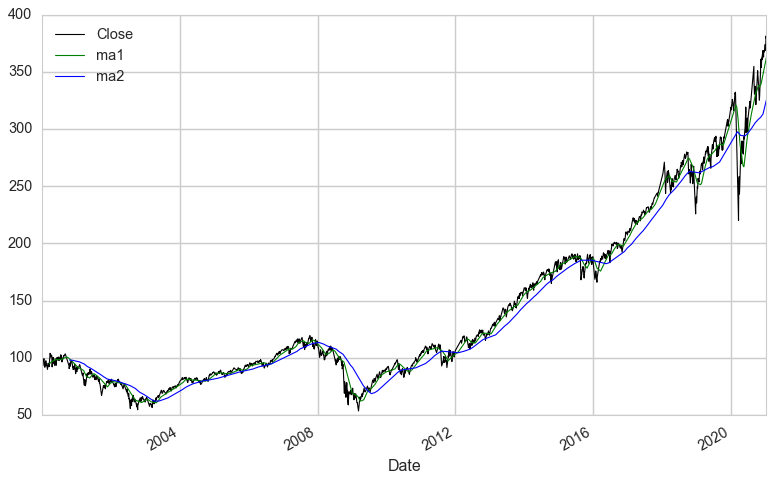

In [176]:
# sma 50 & 200
spy['ma1'] = spy['Close'].rolling(window=50).mean()
spy['ma2'] = spy['Close'].rolling(window=200).mean()
# spy.loc[~np.isnan(spy['ma1'])] # 5242 rows × 9 columns
spy[['Close', 'ma1', 'ma2']].plot(color=['black', 'green', 'blue'], linewidth=1)

In [9]:
# rolling std
spy['Returns stdevs'] = stdevs = returns.rolling(window=20).std()
# spy['Returns ma20'].plot(linewidth=1, color='firebrick')

fig, axs = plt.subplots(2)
fig.suptitle('Returns and stdevs')
axs[0].plot(returns, linewidth=1, color='darkorange')
axs[1].plot(stdevs, linewidth=1, color='firebrick')

NameError: name 'returns' is not defined

In [189]:
spy[['Return', 'Returns stdevs']].tail()

,Return,Returns stdevs
Date,,
2021-01-06,0.005979,0.006218
2021-01-07,0.014857,0.006958
2021-01-08,0.005698,0.006566
2021-01-11,-0.006741,0.006845
2021-01-12,0.000211,0.006819


In [191]:
spy['Return pct'] = spy['Return'] * 100
spy['Returns stdevs pct'] = spy['Returns stdevs'] * 100
spy[['Return pct', 'Returns stdevs pct']].describe()

,Return pct,Returns stdevs pct
count,5290.000000,5271.000000
mean,0.033386,1.040338
std,1.252926,0.710884
min,-10.942365,0.200985
25%,-0.463089,0.597437
50%,0.067804,0.862681
75%,0.592666,1.273297
max,14.519755,6.042227


**Market volatility**

[post](https://mathbabe.org/2011/07/24/measuring-historical-volatility/)


**Log returns** 

[post](https://mathbabe.org/2011/08/30/why-log-returns/)

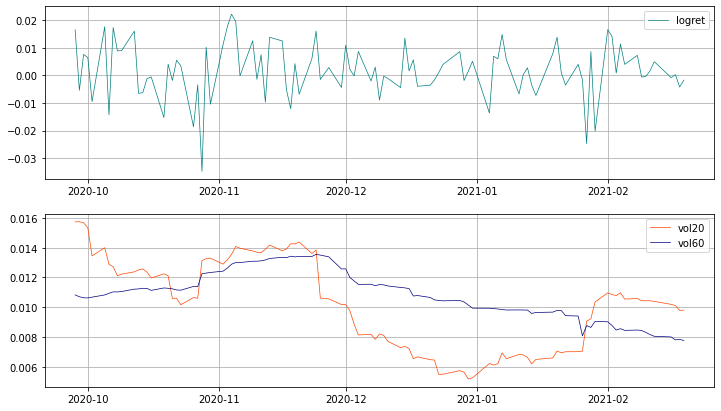

In [17]:
# calculating log returns 
spy['logret'] = logret = np.log(spy['Close'] / spy['Close'].shift(1))

# volatility estimate - 4 weeks
spy['volatility'] = vol = logret.rolling(window=20).std()
spy['volatility60'] = vol60 = logret.rolling(window=60).std()

# plot
fig, axs = plt.subplots(2)
axs[0].plot(logret[-100:], linewidth=.7, color='teal', label='logret')
axs[1].plot(vol[-100:], linewidth=.7, color='orangered', label='vol20')
axs[1].plot(vol60[-100:], linewidth=.7, color='navy', label='vol60')

axs[0].grid(True)
axs[1].grid(True)
# axs[0].spines['top'].set_visible(False)
axs[0].legend()
axs[1].legend()

***Basic Strategy Example***

* BUY ON CLOSE when SPY drops 0.5% (or more)
* SELL ON CLOSE of next day

In [55]:
pf = pd.DataFrame({'spy': spy['Return']}).fillna(0)


In [26]:
pf.tail()

,spy
Date,
2021-02-12,0.004940
2021-02-16,-0.000866
2021-02-17,0.000229
2021-02-18,-0.004256
2021-02-19,-0.001766


In [57]:
pf['2_days_ago'] = pf['spy'].shift(2)  <= -0.005 
pf['yesterday'] = pf['spy'].shift(1)  <= -0.005 
pf['today'] = pf['spy']  <= -0.005 
pf.head(10)

,spy,2_days_ago,yesterday,today
Date,,,,
2000-01-03,0.000000,False,False,False
2000-01-04,-0.039106,False,False,True
2000-01-05,0.001789,False,True,False
2000-01-06,-0.016071,True,False,True
2000-01-07,0.058076,False,True,False
2000-01-10,0.003430,True,False,False
2000-01-11,-0.011966,False,False,True
2000-01-12,-0.009948,False,True,True
2000-01-13,0.013543,True,True,False


In [61]:
# pf['strategy'] = pf['yesterday']['spy'] WON'T WORK!! we need to broadcast
pf['strategy'] = pf[ pf['yesterday'] ]['spy'] 

pf.head(10)

,spy,2_days_ago,yesterday,today,strategy
Date,,,,,
2000-01-03,0.000000,False,False,False,NaN
2000-01-04,-0.039106,False,False,True,NaN
2000-01-05,0.001789,False,True,False,0.001789
2000-01-06,-0.016071,True,False,True,NaN
2000-01-07,0.058076,False,True,False,0.058076
2000-01-10,0.003430,True,False,False,NaN
2000-01-11,-0.011966,False,False,True,NaN
2000-01-12,-0.009948,False,True,True,-0.009948
2000-01-13,0.013543,True,True,False,0.013543


**just scooping up returns from these days**

In [65]:
pf['strategy_ret'] = pf['strategy'].fillna(0).cumsum()
pf.head(10)

,spy,2_days_ago,yesterday,today,strategy,strategy_ret
Date,,,,,,
2000-01-03,0.000000,False,False,False,NaN,0.000000
2000-01-04,-0.039106,False,False,True,NaN,0.000000
2000-01-05,0.001789,False,True,False,0.001789,0.001789
2000-01-06,-0.016071,True,False,True,NaN,0.001789
2000-01-07,0.058076,False,True,False,0.058076,0.059865
2000-01-10,0.003430,True,False,False,NaN,0.059865
2000-01-11,-0.011966,False,False,True,NaN,0.059865
2000-01-12,-0.009948,False,True,True,-0.009948,0.049917
2000-01-13,0.013543,True,True,False,0.013543,0.063460


<AxesSubplot:xlabel='Date'>

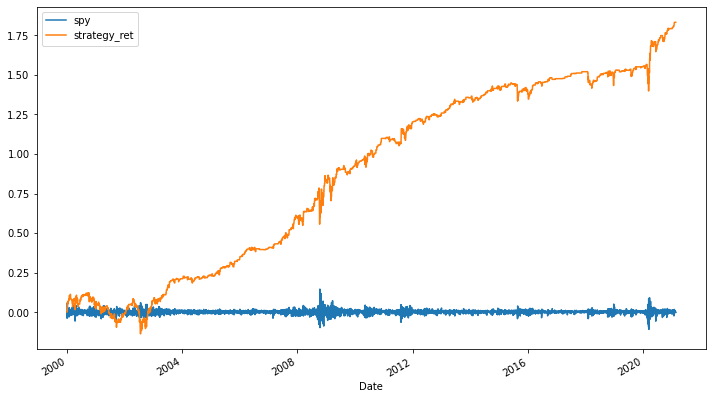

In [68]:
# pf[['spy','strategy_ret']].plot() # is shit, one is pct, the second in cumsum

In [70]:
pf['spy_ret'] = pf['spy'].cumsum()

<AxesSubplot:xlabel='Date'>

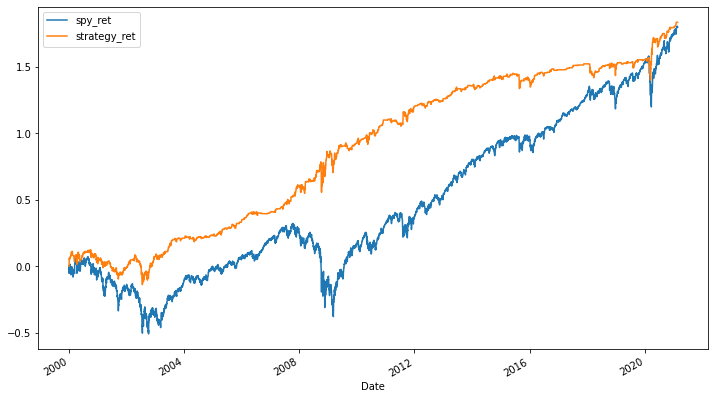

In [71]:
# WOW this really looks much worse in 2021 than in 2016!!
pf[['spy_ret','strategy_ret']].plot()

<AxesSubplot:xlabel='Date'>

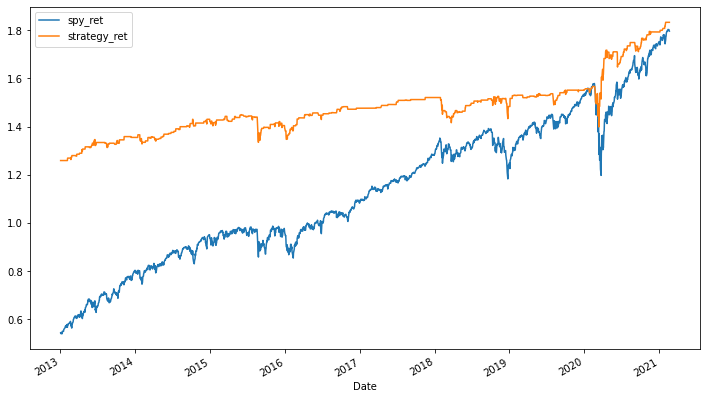

In [72]:
pf.loc["2013-01-01":"2021-02-19", ['spy_ret','strategy_ret']].plot()